# PspNet Semantic Segmentation

General Workflow:
1. Load Google street view images
2. Segmentation
3. Save results to a csv

### 1. Import the Color Pallete for different street features

In [13]:
### 1.Import Color Pallete
# import tensorflow 
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

labels_citys = [
    #     name id trainId  category catId  hasInstances ignoreInEval  color
    Label('unlabeled',  0,  (0,  0,  0)),
    Label('ego vehicle',  1,    (0,  0,  0)),
    Label('rectification border',  2,   (0,  0,  0)),
    Label('out of roi',  3,     (0,  0,  0)),
    Label('static',  4,     (0,  0,  0)),
    Label('dynamic',  5,    (111, 74,  0)),
    Label('ground',  6,     (81,  0, 81)),
    Label('road',  7,       (128, 64, 128)),
    Label('sidewalk',  8,   (244, 35, 232)),
    Label('parking',  9,      (250, 170, 160)),
    Label('rail track', 10,      (230, 150, 140)),
    Label('building', 11,        (70, 70, 70)),
    Label('wall', 12,        (102, 102, 156)),
    Label('fence', 13,        (190, 153, 153)),
    Label('guard rail', 14,      (180, 165, 180)),
    Label('bridge', 15,      (150, 100, 100)),
    Label('tunnel', 16,      (150, 120, 90)),
    Label('pole', 17,        (153, 153, 153)),
    Label('polegroup', 18,      (153, 153, 153)),
    Label('traffic light', 19,        (250, 170, 30)),
    Label('traffic sign', 20,        (220, 220,  0)),
    Label('vegetation', 21,        (107, 142, 35)),
    Label('terrain', 22,    (152, 251, 152)),
    Label('sky', 23,(70, 130, 180)),
    Label('person', 24,(220, 20, 60)),
    Label('rider', 25,(255,  0,  0)),
    Label('car', 26,(0,  0, 142)),
    Label('truck', 27,(0,  0, 70)),
    Label('bus', 28, (0, 60, 100)),
    Label('caravan', 29,(0,  0, 90)),
    Label('trailer', 30,(0,  0, 110)),
    Label('train', 31, (0, 80, 100)),
    Label('motorcycle', 32,(0,  0, 230)),
    Label('bicycle', 33, (119, 11, 32)),
    Label('license plate', -1, (0,  0, 142)),
]

ade20k_id2label = {label.id: label for label in labels_ade}
citys_id2label = {label.id: label for label in labels_citys}

In [14]:
### 1.Import Color Pallete
# import tensorflow 
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

labels_citys = [
    #     name id trainId  category catId  hasInstances ignoreInEval  color
    Label('unlabeled',  0,  (0,  0,  0)),
    Label('ego vehicle',  1,    (0,  0,  0)),
    Label('rectification border',  2,   (0,  0,  0)),
    Label('out of roi',  3,     (0,  0,  0)),
    Label('static',  4,     (0,  0,  0)),
    Label('dynamic',  5,    (111, 74,  0)),
    Label('ground',  6,     (81,  0, 81)),
    Label('road',  7,       (128, 64, 128)),
    Label('sidewalk',  8,   (244, 35, 232)),
    Label('parking',  9,      (250, 170, 160)),
    Label('rail track', 10,      (230, 150, 140)),
    Label('building', 11,        (70, 70, 70)),
    Label('wall', 12,        (102, 102, 156)),
    Label('fence', 13,        (190, 153, 153)),
    Label('guard rail', 14,      (180, 165, 180)),
    Label('bridge', 15,      (150, 100, 100)),
    Label('tunnel', 16,      (150, 120, 90)),
    Label('pole', 17,        (153, 153, 153)),
    Label('polegroup', 18,      (153, 153, 153)),
    Label('traffic light', 19,        (250, 170, 30)),
    Label('traffic sign', 20,        (220, 220,  0)),
    Label('vegetation', 21,        (107, 142, 35)),
    Label('terrain', 22,    (152, 251, 152)),
    Label('sky', 23,(70, 130, 180)),
    Label('person', 24,(220, 20, 60)),
    Label('rider', 25,(255,  0,  0)),
    Label('car', 26,(0,  0, 142)),
    Label('truck', 27,(0,  0, 70)),
    Label('bus', 28, (0, 60, 100)),
    Label('caravan', 29,(0,  0, 90)),
    Label('trailer', 30,(0,  0, 110)),
    Label('train', 31, (0, 80, 100)),
    Label('motorcycle', 32,(0,  0, 230)),
    Label('bicycle', 33, (119, 11, 32)),
    Label('license plate', -1, (0,  0, 142)),
]

ade20k_id2label = {label.id: label for label in labels_ade}
citys_id2label = {label.id: label for label in labels_citys}

### 2. Generate the downloaded jpg list

In [15]:
### 2.Generate jpg list
from os import listdir
from mxnet import image
from os.path import isfile, join
import pandas as pd

path="images_data/"
path_out="pspnet/PspNet/"
path_out_lgd="pspnet/PspNetLgd/"
df_pspnet=pd.DataFrame()
print("Photo path is: %s"%(path))
all_files = [f for f in listdir(path)]
### Get only text files
jpg_files = list(filter(lambda x: x[-5:] == ('.jpeg') or x[-4:] == ('.jpg'), all_files))
jpg_files.sort()
print(jpg_files) 
print("1.Image Files in the folder:",len(jpg_files))


Photo path is: images_data/
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '1

### 2.1 Test whether the images can be called and what are there format

In [16]:
### 2.1 Get image
for filename in jpg_files[0:10]:
    print((filename.split('.')[0]))
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    print(filename,'image shape:',img.shape)

1
1.jpg image shape: (400, 640, 3)
10
10.jpg image shape: (400, 640, 3)
100
100.jpg image shape: (400, 640, 3)
101
101.jpg image shape: (400, 640, 3)
102
102.jpg image shape: (400, 640, 3)
103
103.jpg image shape: (400, 640, 3)
104
104.jpg image shape: (400, 640, 3)
105
105.jpg image shape: (400, 640, 3)
106
106.jpg image shape: (400, 640, 3)
107
107.jpg image shape: (400, 640, 3)


In [17]:
file = ['0','1','2','3','4','5']
for x in file[:3]:
    print(x)

0
1
2


### 3.Apply PSPNET to images and generate a csv

In [18]:
### 3.Apply PSPNET to images and generate a csv
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches 
from matplotlib.font_manager import FontProperties
import numpy as np
import collections
from gluoncv.utils.viz import get_color_pallete

keywords=['mountain','water','lake','sky','bridge','pier',
          'ceiling','building','skyscraper','wall','fence','windowpane','glass',
          'tree','grass','plant','road','sidewalk','earth',
          'person','minibike','bicycle','car','van',
          'sofa','chair','booth','fountain','railing','signboard','column','awning','desk','lamp',
          'streetlight','sculpture','ashcan','bulletin board']


In [19]:
### 0.Using cpu
ctx = mx.cpu(0)
# Get pre-trained model | PSPNET Cityscape
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)
# Set up legend font
fontP = FontProperties()
fontP.set_size('x-small') 

self.crop_size 480


In [20]:
ID=0
number = len(jpg_files)
for filename in jpg_files:
    
    # ************* Start Timer***
    t1 = time.time()
    
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    #print(path+filename,img.shape)
    size=img.shape[0]*img.shape[1]
#     # Display origin image
#     plt.imshow(img.asnumpy())
#     plt.show()    
    ### 2.Normalize the image using dataset mean
    transform_fn = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.485, .456, .406], [.229, .224, .225])])
    img = transform_fn(img)
    img = img.expand_dims(0).as_in_context(ctx)
    ### 3. Apply pre-trained model to the loaded image
    output = model.demo(img)
    ### 4.Make prediction using single scale
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    ### 5.Add color pallete for visualization
    mask = get_color_pallete(predict, 'ade20k')
    # 5.1 Save predict outcome
    fileID=(filename.split('.')[0]).split('_')[0]
    print('***Read file:%s, with FileID:%s'%(filename,fileID))
    mask.save(path_out+fileID+'.png')
    
    #print("runtime:",datetime.now()-startTime) # stop timer
    # 5.2 Show the predicted mask | PSPNET
#     mmask = mpimg.imread(path_out+fileID+'.png')
    plt.imshow(mask)
#     plt.show()    
    ### 6. Result Analysis and add legends ***************************
    # 0:Label, 1:Label ID and 2: Label Color
    unique, counts = np.unique(predict, return_counts=True)
    ratio_dict=dict(zip(unique, counts))
    labelratio_dict={}
    legend_dict={}
    ### Get Ratio
    for key in ratio_dict.keys():
        #Rescale RGB to (0,1)
        #np.interp(ade20k_id2label[key][2], (0, 255), (0, 1))
        legend_dict[ade20k_id2label[key][0]]=np.round(np.interp(ade20k_id2label[key][2], (0, 255), (0, 1)),6)
        labelratio_dict[ade20k_id2label[key][0]]=round(ratio_dict[key]/size,6)
    #print('1.Index Ratio:',ratio_dict,'\n2.Label Color:',legend_dict)
    ### 7. Show the predicted mask | PSPNET with Legend Label
    # 7.1.Show mmask image
    #mmask = mpimg.imread(path_out+fileID+'.png')
    # Display masked image
    #plt.imshow(mmask)
    # 7.2.Add Legend
    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color=legend_dict[key], label=key)
            patchList.append(data_key)
    plt.legend(handles=patchList,loc='best',fontsize='x-small',prop=fontP,labelspacing=0.2)
    plt.savefig(path_out_lgd+fileID+'.png', bbox_inches='tight')
    plt.close()
    # Display masked image with legend
    #plt.show()
    #print (labelratio_dict)        
    df_pspnet.loc[ID,'FID']=fileID
    for key in labelratio_dict.keys():
        if key in keywords:
            df_pspnet.loc[ID,key]=labelratio_dict[key]    
    ID+=1
    
    # *************Stop Timer***
    t2 = time.time()
    print('runtime',t2-t1)
    df_pspnet.to_csv('pspnet/pspnet_result.csv', index=False, encoding='utf-8')


# Save the segmentation result to a csv in the folder
df_pspnet.to_csv('pspnet/pspnet_result.csv', index=False, encoding='utf-8')
print("All Done")
df_pspnet.head(number - 1)

***Read file:1.jpg, with FileID:1
runtime 15.032004117965698
***Read file:10.jpg, with FileID:10
runtime 14.248461961746216
***Read file:100.jpg, with FileID:100
runtime 13.730196952819824
***Read file:101.jpg, with FileID:101
runtime 14.189060926437378
***Read file:102.jpg, with FileID:102
runtime 14.506523847579956
***Read file:103.jpg, with FileID:103
runtime 14.112162113189697
***Read file:104.jpg, with FileID:104
runtime 13.930369138717651
***Read file:105.jpg, with FileID:105
runtime 14.133447885513306
***Read file:106.jpg, with FileID:106
runtime 13.893512964248657
***Read file:107.jpg, with FileID:107
runtime 13.89336109161377
***Read file:108.jpg, with FileID:108
runtime 13.787703037261963
***Read file:109.jpg, with FileID:109
runtime 14.042505025863647
***Read file:11.jpg, with FileID:11
runtime 14.07704496383667
***Read file:110.jpg, with FileID:110
runtime 14.267422199249268
***Read file:111.jpg, with FileID:111
runtime 14.852153062820435
***Read file:112.jpg, with FileID:1

runtime 18.109622955322266
***Read file:214.jpg, with FileID:214
runtime 17.925785064697266
***Read file:215.jpg, with FileID:215
runtime 18.588521003723145
***Read file:216.jpg, with FileID:216
runtime 17.626961946487427
***Read file:217.jpg, with FileID:217
runtime 17.430596113204956
***Read file:218.jpg, with FileID:218
runtime 17.53012990951538
***Read file:219.jpg, with FileID:219
runtime 17.550996780395508
***Read file:22.jpg, with FileID:22
runtime 17.46436905860901
***Read file:220.jpg, with FileID:220
runtime 17.736905097961426
***Read file:221.jpg, with FileID:221
runtime 17.527189016342163
***Read file:222.jpg, with FileID:222
runtime 17.506091117858887
***Read file:223.jpg, with FileID:223
runtime 17.45006799697876
***Read file:224.jpg, with FileID:224
runtime 17.44667911529541
***Read file:225.jpg, with FileID:225
runtime 17.4360671043396
***Read file:226.jpg, with FileID:226
runtime 17.4654438495636
***Read file:227.jpg, with FileID:227
runtime 17.812830924987793
***Read 

***Read file:329.jpg, with FileID:329
runtime 17.581455945968628
***Read file:33.jpg, with FileID:33
runtime 18.179216861724854
***Read file:330.jpg, with FileID:330
runtime 17.584784030914307
***Read file:331.jpg, with FileID:331
runtime 17.465189933776855
***Read file:332.jpg, with FileID:332
runtime 17.86673593521118
***Read file:333.jpg, with FileID:333
runtime 17.50949192047119
***Read file:334.jpg, with FileID:334
runtime 17.48384714126587
***Read file:335.jpg, with FileID:335
runtime 17.535826921463013
***Read file:336.jpg, with FileID:336
runtime 18.179502248764038
***Read file:337.jpg, with FileID:337
runtime 17.5333251953125
***Read file:338.jpg, with FileID:338
runtime 17.478816986083984
***Read file:339.jpg, with FileID:339
runtime 17.57140612602234
***Read file:34.jpg, with FileID:34
runtime 17.51144814491272
***Read file:340.jpg, with FileID:340
runtime 17.46962594985962
***Read file:341.jpg, with FileID:341
runtime 17.70755910873413
***Read file:342.jpg, with FileID:342


runtime 17.604104042053223
***Read file:444.jpg, with FileID:444
runtime 17.5164577960968
***Read file:445.jpg, with FileID:445
runtime 17.663156032562256
***Read file:446.jpg, with FileID:446
runtime 18.245070219039917
***Read file:447.jpg, with FileID:447
runtime 17.77513885498047
***Read file:448.jpg, with FileID:448
runtime 17.55393099784851
***Read file:449.jpg, with FileID:449
runtime 17.752315998077393
***Read file:45.jpg, with FileID:45
runtime 17.486194849014282
***Read file:450.jpg, with FileID:450
runtime 17.51721501350403
***Read file:451.jpg, with FileID:451
runtime 17.649049997329712
***Read file:452.jpg, with FileID:452
runtime 17.61070990562439
***Read file:453.jpg, with FileID:453
runtime 17.50193500518799
***Read file:454.jpg, with FileID:454
runtime 18.648972034454346
***Read file:455.jpg, with FileID:455
runtime 18.0139262676239
***Read file:456.jpg, with FileID:456
runtime 17.55174994468689
***Read file:457.jpg, with FileID:457
runtime 17.558671236038208
***Read fi

***Read file:559.jpg, with FileID:559
runtime 17.654139280319214
***Read file:56.jpg, with FileID:56
runtime 17.509260654449463
***Read file:560.jpg, with FileID:560
runtime 18.06339979171753
***Read file:561.jpg, with FileID:561
runtime 17.847294092178345
***Read file:562.jpg, with FileID:562
runtime 17.520818948745728
***Read file:563.jpg, with FileID:563
runtime 17.708072900772095
***Read file:564.jpg, with FileID:564
runtime 17.789229154586792
***Read file:565.jpg, with FileID:565
runtime 17.546140909194946
***Read file:566.jpg, with FileID:566
runtime 17.583054780960083
***Read file:567.jpg, with FileID:567
runtime 17.633252143859863
***Read file:568.jpg, with FileID:568
runtime 17.797504901885986
***Read file:569.jpg, with FileID:569
runtime 17.666558980941772
***Read file:57.jpg, with FileID:57
runtime 18.24214506149292
***Read file:570.jpg, with FileID:570
runtime 18.532778024673462
***Read file:571.jpg, with FileID:571
runtime 17.66118621826172
***Read file:572.jpg, with FileI

,FID,wall,building,sky,tree,road,sidewalk,person,plant,car,...,fountain,column,bicycle,awning,mountain,water,bridge,skyscraper,chair,ceiling
0,1,0.006832,0.441113,0.070480,0.042574,0.308508,0.048512,0.023293,0.010934,0.034305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,NaN,NaN,0.116230,0.422137,0.270016,NaN,NaN,0.063914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,NaN,0.387465,0.050016,0.081184,0.322207,0.014242,0.003305,NaN,0.141570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,NaN,0.297176,0.045051,0.207008,0.310141,0.000484,NaN,NaN,0.140141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,0.003637,0.239695,0.090637,0.251906,0.230910,0.000715,NaN,NaN,0.158012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,94,0.006828,0.410320,0.043605,0.133293,0.191812,0.006352,NaN,NaN,0.200848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,95,NaN,0.173566,0.007754,0.389848,0.189406,0.001688,NaN,0.005180,0.227762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,96,NaN,0.353348,0.115809,0.097301,0.200023,0.044016,0.000602,NaN,0.176977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,97,0.026547,0.416926,0.117238,0.049301,0.066117,0.166914,0.003887,0.015031,0.106816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Read the csv result

Notice that there are many NaN, which means that no data, we will replace these NaN with 0

#### 4.1 Read the csv result

In [23]:
# 4.1 Read the csv result
df_psp=pd.read_csv('pspnet/pspnet_result.csv', encoding='utf-8', engine='python')
df_psp.head(3)

,FID,wall,building,sky,tree,road,sidewalk,person,plant,car,...,fountain,column,bicycle,awning,mountain,water,bridge,skyscraper,chair,ceiling
0,1,0.006832,0.441113,0.070480,0.042574,0.308508,0.048512,0.023293,0.010934,0.034305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,NaN,NaN,0.116230,0.422137,0.270016,NaN,NaN,0.063914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,NaN,0.387465,0.050016,0.081184,0.322207,0.014242,0.003305,NaN,0.141570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 4.2 Replace the NaN with 0 using fillna(0), and save the result to a new csv file
df_psp=df_psp.fillna(0)

# save the result to a new csv file
df_psp.to_csv('pspnet/pspnet_final.csv', index=False, encoding='utf-8')

df_psp.head(3)

,FID,wall,building,sky,tree,road,sidewalk,person,plant,car,...,fountain,column,bicycle,awning,mountain,water,bridge,skyscraper,chair,ceiling
0,1,0.006832,0.441113,0.070480,0.042574,0.308508,0.048512,0.023293,0.010934,0.034305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,0.000000,0.000000,0.116230,0.422137,0.270016,0.000000,0.000000,0.063914,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,0.000000,0.387465,0.050016,0.081184,0.322207,0.014242,0.003305,0.000000,0.141570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Visualization

Notice that there are many NaN, which means that no data, we will replace these NaN with 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 5.1 Read the csv result

In [184]:
# 4.1 Read the csv result
df_psp=pd.read_csv('pspnet/pspnet_final.csv', encoding='utf-8', engine='python')
df_psp = df_psp.sort_values(by='FID')
df = df_psp
df = df.reset_index(drop = True)
list_num = df.shape[1]
row_num = df.shape[0]
col = list(df.columns)
row = list(df.index)
print('The total row is',row_num,'The total list is',list_num)
print('col is',col, ',row is',row)
df.head(3)

The total row is 597 The total list is 29
col is ['FID', 'wall', 'building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'plant', 'car', 'fence', 'signboard', 'minibike', 'grass', 'earth', 'streetlight', 'van', 'ashcan', 'railing', 'fountain', 'column', 'bicycle', 'awning', 'mountain', 'water', 'bridge', 'skyscraper', 'chair', 'ceiling'] ,row is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 

,FID,wall,building,sky,tree,road,sidewalk,person,plant,car,...,fountain,column,bicycle,awning,mountain,water,bridge,skyscraper,chair,ceiling
0,1,0.006832,0.441113,0.070480,0.042574,0.308508,0.048512,0.023293,0.010934,0.034305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000113,0.350605,0.069145,0.052035,0.324512,0.047559,0.000000,0.000000,0.071406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.000000,0.335336,0.106020,0.068867,0.185367,0.000070,0.044828,0.000000,0.145477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.2 Read the csv row and list

#### 5.3 Set xticks

Text(0.5, 1.0, 'Scores by group and gender')

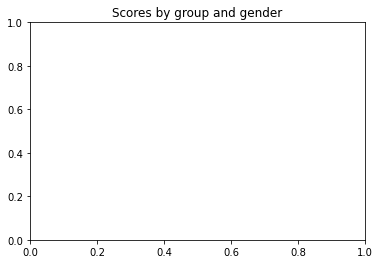

In [185]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Scores by group and gender')

In [186]:
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

In [195]:
col[0]


'FID'

In [203]:
fields = []
colors = []
for i in range(len(col)):
    fields.append(col[i])
fields.pop(0)
count = 0

for i in range(len(fields)):
    for j in range(len(labels_ade)):
        if fields[i] == labels_ade[j][0]:
            colors.append(labels_ade[j][2])
            count = count + 1
print("total copy", count ,'color')
colors
fields


total copy 28 color


['wall',
 'building',
 'sky',
 'tree',
 'road',
 'sidewalk',
 'person',
 'plant',
 'car',
 'fence',
 'signboard',
 'minibike',
 'grass',
 'earth',
 'streetlight',
 'van',
 'ashcan',
 'railing',
 'fountain',
 'column',
 'bicycle',
 'awning',
 'mountain',
 'water',
 'bridge',
 'skyscraper',
 'chair',
 'ceiling']

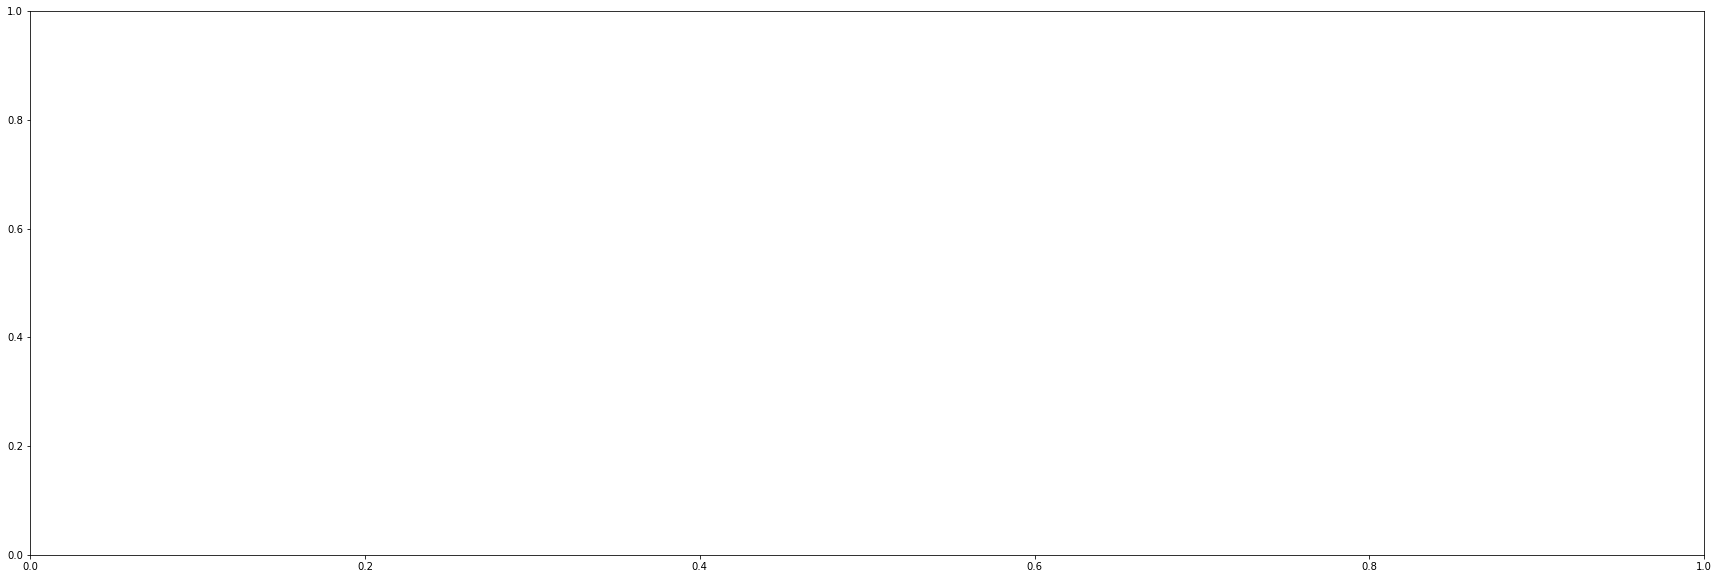

In [211]:
#图形和轴
fig, ax = plt.subplots(1, figsize=(30, 10))
# 绘图


In [209]:
len(df)

597